In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
x = df.drop('target', axis='columns')

In [20]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=10)

In [39]:
para = {
    'n_estimators' : [5,10,15,20,25,30],
    'min_samples_split':[5,10,15,20,25,30],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

In [40]:
from sklearn.model_selection import GridSearchCV
mdl = GridSearchCV(model, param_grid=para)

In [41]:
mdl.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(min_samples_split=5,
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [42]:
mdl.score(xtest,ytest)

0.9777777777777777

In [43]:
mdl.best_params_

{'criterion': 'log_loss', 'min_samples_split': 30, 'n_estimators': 5}

In [44]:
mdl.best_score_

0.9714285714285713

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,min_samples_split=5)

In [30]:
model.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_split=5, n_estimators=10)

In [48]:
ypre = mdl.predict(xtest)

In [49]:
from sklearn.metrics import confusion_matrix, consensus_score
cm = confusion_matrix(ypre, ytest)

In [50]:
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

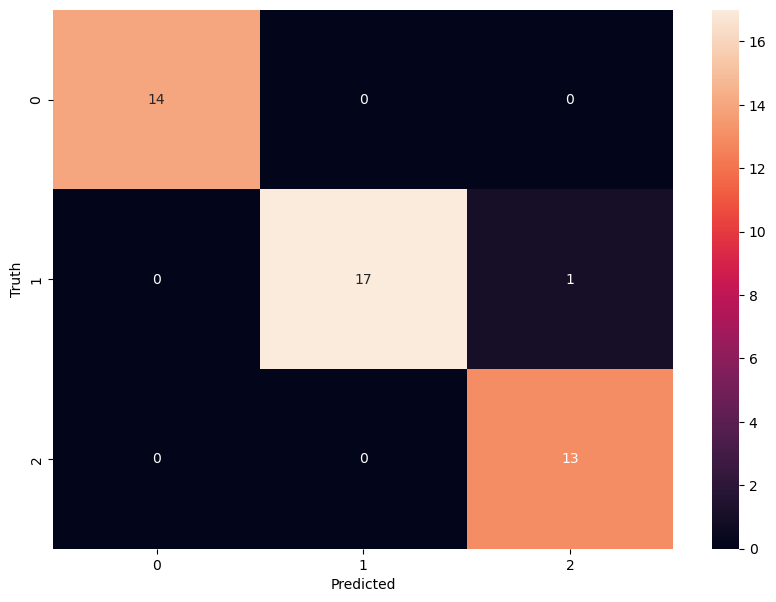

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')